## Математические пакеты

## Лабораторная работа №2: Анализ речевых сигналов при помощи дискретного преобразования Фурье
### Выполнил студент группы 9381 Судаков Евгений, вариант 16.

## Цель работы

Практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.

## Задачи

1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса;
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса;
3. Построить сонограмму по записи своего голоса.

In [59]:
import numpy as np
import scipy.signal as spectrogram
import IPython.display as ipd
import matplotlib.pyplot as plt
import more_itertools as mit
import wave

filename = "voice_16khz.wav"

types = {
    1: np.int8,
    2: np.int16,
    4: np.int32
}

audiofile = wave.open(filename, "rb")
signal = np.frombuffer(audiofile.readframes(audiofile.getnframes()), types[audiofile.getsampwidth()])
(nchannels, sampwidth, framerate, nframes, comptype, compname) = audiofile.getparams()

In [60]:
ipd.Audio(signal, rate = framerate)

In [61]:
print("Channels number: ", nchannels)
print("Sample width: ", sampwidth)
print("Framerate: ", framerate)
print("Number of frames: ", nframes)
print("Compressoin type: ", comptype)
print("Compression name: ", compname)

Channels number:  1
Sample width:  2
Framerate:  16000
Number of frames:  107136
Compressoin type:  NONE
Compression name:  not compressed


График аудиосигнала:

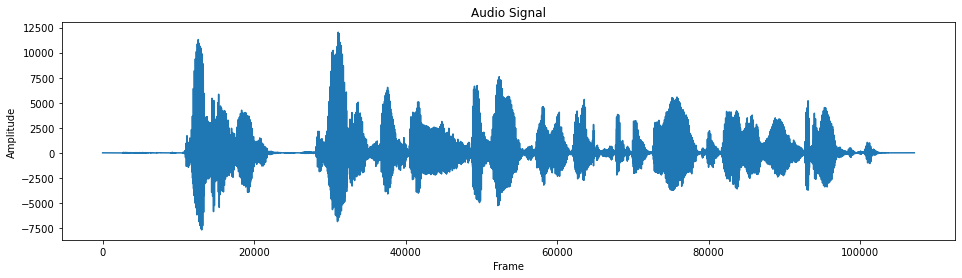

In [62]:
plt.figure(figsize=(16, 4))
plt.title("Audio Signal")
plt.ylabel("Amplitude")
plt.xlabel("Frame")
plt.plot(signal)

#### Используем ДПФ для построения траектории основного тона (F0):



In [63]:
def dft(x):
    x_length = len(x)
    x = np.array(x, dtype=float)
    i = np.arange(x_length).reshape((x_length, 1))
    j = i.reshape((1, x_length))
    transformation_matrix = np.exp(2 * np.pi * 1j * i.dot(j) / x_length)
    return np.dot(transformation_matrix, x)

In [64]:
dimension = 1024
window_offset = 256
spectral_resolution = audiofile.getframerate() // dimension

print("Dimension:", dimension)
print("Window offset:", window_offset)
print("Spectral resolution:", spectral_resolution)

Dimension: 1024
Window offset: 256
Spectral resolution: 15


In [65]:
h_windowed_dft = lambda interval: dft(interval * np.hamming(len(interval)))
signal_intervals = mit.windowed(signal, fillvalue=0, n=dimension, step=window_offset)
signal_intervals = list(map(h_windowed_dft, signal_intervals))

amplitude_spectr = [(np.sum([i ** 2 for i in interval[:dimension//2]]) ** 0.5).real for interval in signal_intervals]

#### График аплитудного спектра:

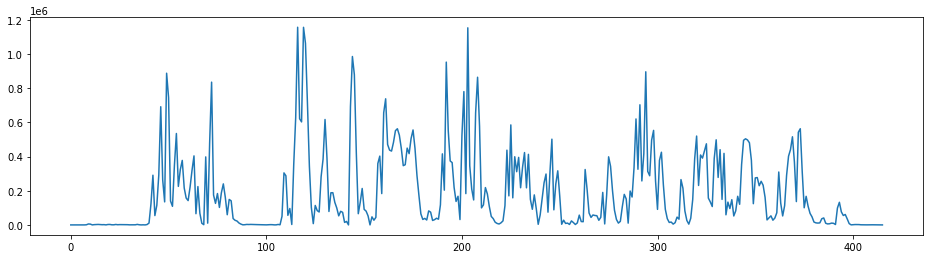

In [66]:
plt.figure(figsize=(16, 4))
plt.plot(amplitude_spectr)

Построим траекторию основного тона:

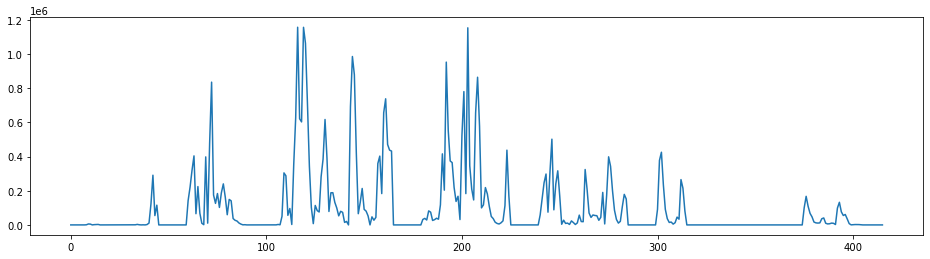

In [67]:
F0 = []   
for i in list(mit.chunked(amplitude_spectr, spectral_resolution)):
    segment = np.array(i)
    if segment.max() > 2.5*segment.mean():            
        F0 += segment.tolist()
    else:
        F0 += [0 for i in range(len(segment))]
        
plt.figure(figsize=(16, 4))
plt.plot(F0)   

### Построим траектории второй, третьей и четвертой формантных частот:

In [68]:
def create_trajectory(f0, index, power):
    new_trajectory = []
    i = 0
    while i < len(f0):
        try:
            max_value = max([f0[index*i-1], f0[index*i], f0[index*i+1]])
            if f0[i] > 2**power * max_value:           
                new_trajectory.append(max_value)
            else:
                new_trajectory.append(0)
        except:
            new_trajectory.append(0)
        i += 1
    return new_trajectory

def create_trajectory_plot(f0, index, power):
    f_i = create_trajectory(f0, index, power)
    plt.figure(figsize=(16, 4))
    plt.plot(f_i)

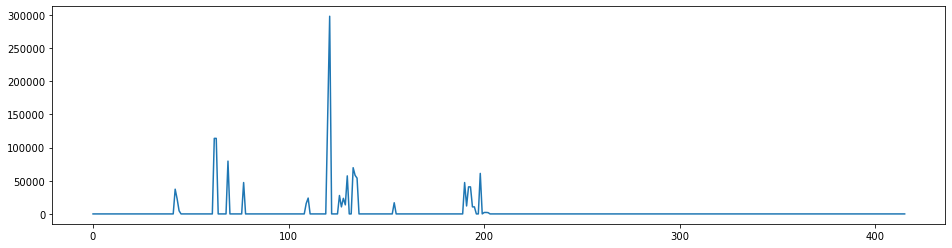

In [69]:
f1 = create_trajectory_plot(F0, 2, 1)

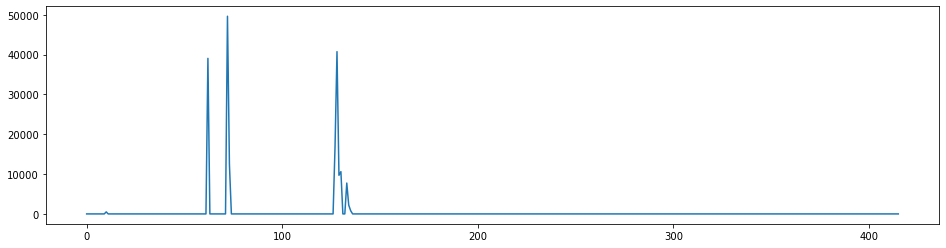

In [70]:
f2 = create_trajectory_plot(F0, 3, 2)

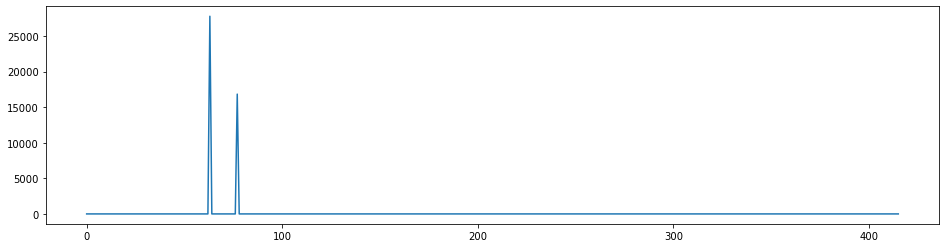

In [71]:
f3 = create_trajectory_plot(F0, 4, 3)

### Построим сонограмму сигнала:

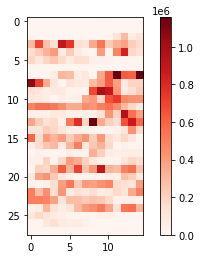

In [72]:
matrix_amp = []

for row in list(mit.chunked(amplitude_spectral, int(spectral_resolution))):
    if len(row) < int(spectral_resolution):
        row.extend([0 for _ in range(int(spectral_resolution) - len(row))])
    matrix_amp.append(row)

matrix_amp = np.array(matrix_amp)

fig, ax = plt.subplots()
h = ax.imshow(matrix_amp, cmap = 'Reds')
fig.colorbar(h)
plt.show()

## Вывод

В ходе выполнения лабораторной работы было изучено дискретное преобразование  Фурье, приобретены базовые навыки работы с jupyter notebook, пакетами scipy, matplotlib, np и др. 
С использованием ДПФ была построена траектория основного тона (F0), траектории второй, третьей и четвертой формантных частот, а также сонограмма.